# Machine Learning From First Principles
### A Workshop by Jack Fraser-Govil


Hello, and welcome to this notebook. Along with the notes, presentation and discussions which we will be having throughout the day, this document will walk you through a series of tasks and exercises which will culminate, by the end of the workshop, in you possessing a fully working Feedforward Neural Network which you have designed and written from scratch. 

In doing so, we hope that you will gain a degree of insight into how these machines are `thinking' under the hood, and thereby pull back some of the mystery and folklore that surrounds ML, and thereby gain a peek inside the black box. We hope that this knowledge will help inform the discussions and presentations for the rest of this conference. 

## What Do I Need?

In order to run this notebook, all you need is the ability to run an ipython/Jupyter notebooks, and some standard python libraries: mostly ```numpy``` and ```matplotlib```. You do *not* need to have ```tensorflow``` or ```pytorch```: the entire point of this exercise is to create a learning framework without relying on pre-built tools.

You *will* need to have read, or be confident that you already know the mathematics contained within [the provided notes](Notes.pdf). If you haven't read them yet (and are not confident that your skillset includes the vector-chain rule and matrix algebra), then I suggest you speed-read Chapters 2, 3 and 4.

The final thing you need is a willingness to engage with some of the murkier, more difficult and mathematically complex components of the workshop: teasing out what these things *mean* is why you are here; so if something sticks out to you as something you don't understand, don't just let it wash over you -- please ask and we can discuss. 


## What if I get stuck?

The first port of call is always to ask me, one of my helpers, or simply someone near to you, for guidance. 

If there's a concept you just can't grasp during the day, I will point you to some resources that you can look at afterwards, and hopefully things will become clearer in retrospect. 

If you get stuck on one of the coding exercises, or cannot complete it before it is time to move on, you will find a [second notebook in this same directory](notebook_solved.ipynb). This notebook will have all of the coding exercises solved for you. That is not to say that it is 'correct', only that this notebook will be *functional*. If you get really, really, really stuck, you can start stealing code from that document. 

##### However

Whilst it is certainly possible (and permitted) for you to do this at any time, the entire purpose of this workshop is for you to come away with the satisfaction of having written your own learning networks from scratch. We are, by definition, reinventing the wheel here: everything we make will be orders of magnitude worse than pytorch or tensorflow; the principle is that **you learn best by doing it yourself**.

If you're going to use the 'cheat sheet', then try, first of all, to simply look at it to understand what it is doing, and then implement your own version. Don't directly copy whole chunks of code you don't understand, as that sort of defeats the point of today's efforts.


## Jack, Why is this Python Written Like Garbage?

That's a very good and very important question. **I am not a python developer**. As a member of the High Performance Algorithms group, I spend most of my time buried in C++ and C code. I have written this workshop assuming that, since the majority of existing ML products are pythonic, that python would be the most accessible language. There are often times where my python code is written like someone used to C-syntax, and blithely unaware to the beautiful, elegant, pythonic way of doing things.

I'm afraid you'll just have to deal with my slightly sub-par python. 

What was **not** a result of subpar python is the choice not to use ```pandas``` for data. I made a conscious decision to keep things as 'mathematical' as possible, rather than abstracted into dataframes. You get a list of vectors (and maybe some labels), and have to deal with them manually, that's part of the bare-bones experience!

I also use ```CamelCase```, not ```snake_case```. Fight me.

## Exercise 1: The Pretrained Perceptron

Just to get the juices flowing, let's get started with an easy project.

**In the ```Data``` directory is a file ```cuteness.tex```, which contains (non-dimensional) measures of size and furriness of some animals, as well as some human-curated labels (1 for cute, 0 for note cute). Please write a method which performs Perceptron classification, and use it to identify which of these creatures the model currently mislabels.**  

I've provided some basic functions and a class framework for you to work from.

In [2]:
#If you are running this in Google Colabs, then you need to uncomment these lines; they act to clone the workshop git locally so that you have access to the data we will be using.
# !git clone https://github.com/wtsi-hpag/xAIWorkshop.git
# %cd xAIWorkshop/Code

# This is the extent of fancy libraries we will be using
import numpy as np
import matplotlib.pyplot as pt

##load and parse the data manually. No pandas to be seen here! This function will be used repeatedly to load in our test data. 
def LoadCategoricalData(file):
	names = []
	labels = []
	data = []
	with open(file) as file:
		for line in file:
			entries = line.rstrip().split(' ')
			names.append(entries[0])
			labels.append(int(entries[1]))
			data.append(np.array([ float(entries[i]) for i in range(2,len(entries))]))
	return names, labels, data

names, labels, data = LoadCategoricalData("Data/cuteness.dat")

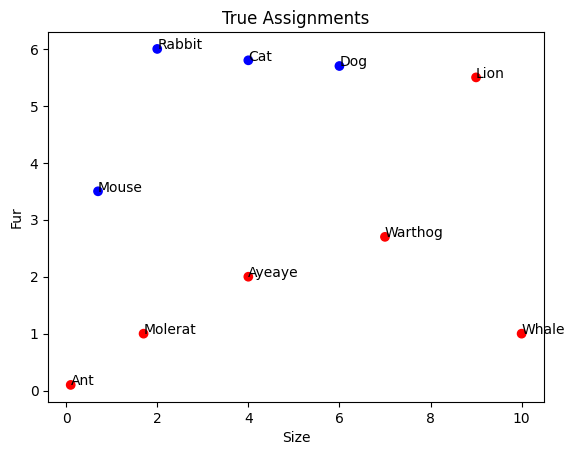

In [3]:
## Here's a basic plotting function, feel free to write your own
def PlotData(positions, labels,names=None):
	labels = [int(b) for b in labels] ## just to make sure the data is ints we can index in, not bools
	cols = ["red","blue"]
	x,y = zip(*positions)
	pt.scatter(x,y,color=np.array(cols)[labels])
	if names is not None:
		for i,pos in enumerate(positions):
			pt.annotate(names[i],pos)
	pt.show()

pt.title("True Assignments")
pt.xlabel("Size")
pt.ylabel("Fur")
PlotData(data,labels,names)

Mislabelled animals are: ['Mouse' 'Rabbit' 'Cat' 'Ant' 'Lion' 'Whale' 'Warthog' 'Molerat' 'Ayeaye']
Success Rate= 10%


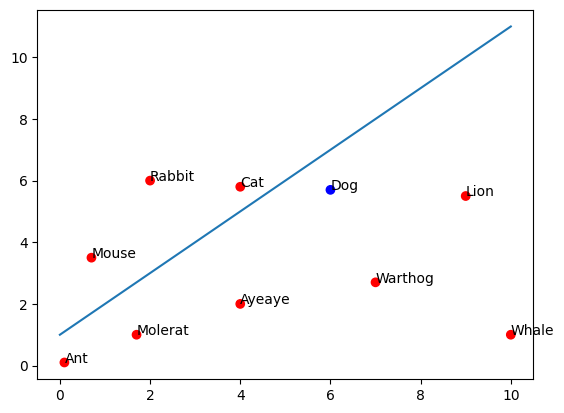

In [4]:
class Perceptron:

	def __init__(self):
		self.Weights = np.array([1,1,-1]) ## we'll use these pre-provided weights for now

	def Predict(self,input):
		
		if type(input) is list:
			out = []
			for r in input:
				# print(r)
				out.append(self.Predict(r))
			return out
		return 1.0 * (np.dot(self.Weights,np.insert(input,0,1)) > 0)

P = Perceptron()

x = np.linspace(0,10,10)
w = P.Weights
y = -w[1]*x/w[2] - w[0]/w[2]
pt.plot(x,y)

predict_labels = P.Predict(data)

# mislabels = p
miss = np.array(names)[predict_labels != np.array(labels)]

print("Mislabelled animals are:", miss)
print(f"Success Rate= {round(100*(1.0 - len(miss) * 1.0/len(names)))}%")

PlotData(data,(predict_labels==np.array(labels)),names)


## Initialise, then call your Perceptron on data. 

## Exercise 2: Training The Perceptron

You should (hopefully) now have a working Perceptron; the only issues is a) it's absolutely terrible and b) I had to give you the weights. 

The next challenge is to write up a training algorithm for the Perceptron. 

**Add a method (Train) to the Perceptron, which iterates over the dataset a number of times (you choose - when is 'enough'?) and updates the weights**

Remember, given a datum $\mathbf{x}$, a prediction $P$ and the correct label $L$ the update formula is:

\begin{equation}
	\mathbf{w} \to \mathbf{w} + r \times \left(L - P(\mathbf{x}) \right)\mathbf{x}
\end{equation}
Where $r$ is your learning rate.

Mislabelled animals are: ['Mouse' 'Rabbit' 'Cat' 'Ant' 'Lion' 'Whale' 'Warthog' 'Molerat' 'Ayeaye']
Success Rate= 10%


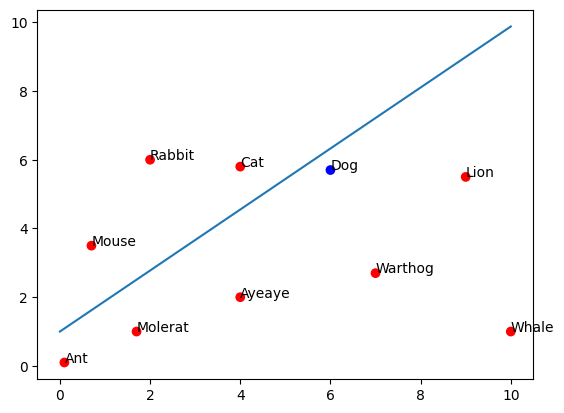

In [5]:
## I'm fully redefining the Perceptron class; just so that these notebook is iteratively solved. You don't have to do that!
class Perceptron:

	def __init__(self):
		self.Weights = np.array([1.0,1,-1]) ## we'll use these pre-provided weights for now

	def Predict(self,input):
		
		if type(input) is list:
			out = []
			for r in input:
				# print(r)
				out.append(self.Predict(r))
			return out
	
		if len(input) == len(self.Weights):
			return 1.0 * (np.dot(self.Weights,input) > 0)
		else:
			return 1.0 * (np.dot(self.Weights,np.insert(input,0,1)) > 0)

	def Train(self, data,labels,fullEpochs = 100):

		rate = 0.001
		for l in range(fullEpochs):
			noMistakes = True
			for r in range(len(data)):
				x = np.insert(data[r],0,1) ## bulk up with the additional dimension.
				P = self.Predict(x)

				update = rate*(labels[r]-P) * x
				self.Weights +=  update
				if (P!= labels[r]):
					noMistakes = False
			if noMistakes:
				print("Converged early, after",l,"epochs")
				return
P = Perceptron()

P.Train(data,labels,5)

## analyse the missed animals
predict_labels = P.Predict(data)
miss = np.array(names)[predict_labels != np.array(labels)]
print("Mislabelled animals are:", miss)
print(f"Success Rate= {round(100*(1.0 - len(miss) * 1.0/len(names)))}%")

## plot a nice line showing the divide
x = np.linspace(0,10,10)
w = P.Weights
y = -w[1]*x/w[2] - w[0]/w[2]
pt.plot(x,y)


PlotData(data,(predict_labels==np.array(labels)),names)



## Exercise 3: The Wrench in the Works

If everything has gone to plan, you now have an algorithm that can correctly identify whether a given animal is cute or note, based on measures of their size and amount of fur. 

Now try running your Perceptron training & testing routines on a new dataset: ```cuteness_augmented```.

**What goes wrong?**

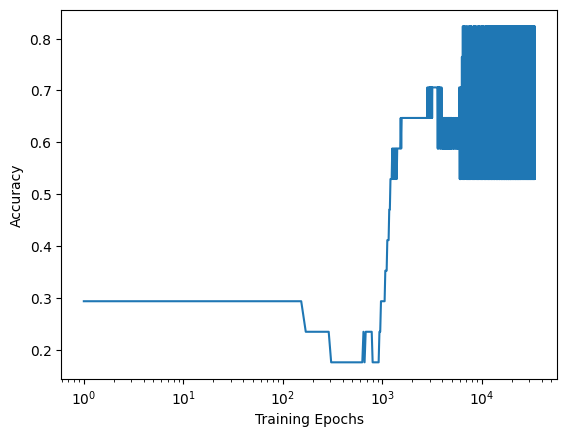

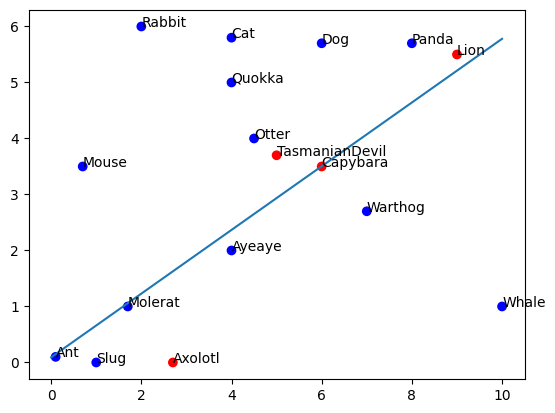

In [6]:
names, labels, data = LoadCategoricalData("Data/cuteness_augmented.dat")


P = Perceptron()

# get random error
predict_labels = P.Predict(data)
miss = predict_labels != np.array(labels)
failure = np.sum(miss) * 1.0/len(data)
s = [1]
p = [1.0 - failure]
for q in range(2000):
	# print(r)
	P.Train(data,labels,1)
	s.append(len(data)*(q+1))
		  
	## analyse the missed animals
	predict_labels = P.Predict(data)
	miss = predict_labels != np.array(labels)
	failure = np.sum(miss) * 1.0/len(data)
	p.append(1.0 - failure)

pt.plot(s,p)
pt.xscale('log')
pt.xlabel('Training Epochs')
pt.ylabel('Accuracy')
pt.show()

## plot a nice line showing the divide
x = np.linspace(0,10,10)
w = P.Weights
y = -w[1]*x/w[2] - w[0]/w[2]
pt.plot(x,y)



PlotData(data,predict_labels==np.array(labels),names)

### Optional Task: The Nonlinear Perceptron

It is perfectly possible to generate a Perceptron which can deal with these difficult and non-linear cases: the trick is that you have to put the nonlinearity in yourself. 

If you have time, try the following:

**Write a nonlinear perceptron which transforms the input vector (x,y) into a nonlinear vector (such as (x,y,x^2,y^3 sin(x))), and then uses this as the vector in a standard Perceptron algorithm. Does it show any improvements? How much work does it take to make the algorithm perfectly separate our cute animals from the uggos?**

 15%|█▍        | 17413/120000 [00:00<00:05, 19550.16it/s]


Converged early, after 17413 epochs


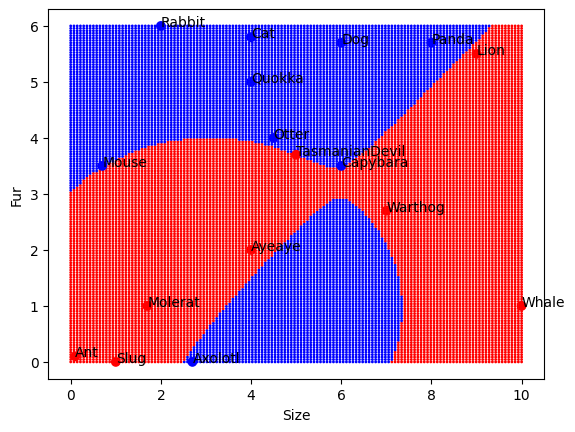

In [7]:
from tqdm import tqdm #ok I lied about no more libraries, but I wanted a progress bar
class NonlinearPerceptron:

	def __init__(self,maxPower=1):
		self.Power = maxPower
		self.nDim = int(((maxPower+2) * (maxPower + 1))/2)
		self.Weights = np.zeros((self.nDim,)) ## we'll use these pre-provided weights for now
		self.Weights[0] = 0.5
		self.Weights[1] = 1
		self.Weights[2] = -1

		# print(self.Weights)
	def Predict(self,input,vectorfied=False):
		
		if type(input) is list:
			out = []
			for r in input:
				# print(r)
				out.append(self.Predict(r))
			return out
		if vectorfied:
			return 1.0 * (np.dot(self.Weights,input) > 0)
		else:
			vec = self.Vectorfy(input)
			return 1.0 * (np.dot(self.Weights,vec) > 0)

	def Vectorfy(self,input):
		
		output = np.zeros((self.nDim,))
		output[0] = 1
		s = 1
		
		for power in range(1,self.Power+1):
			for q in range(power+1):
				output[s] = input[0]**q * input[1]**(power-q)
				s+= 1
		return np.array(output)


	def Train(self, data,labels,fullEpochs = 100):
		vectorfied = [self.Vectorfy(d) for d in data]

		##this is a bit of a hack (and a hint at better optimisation routines!)
		## Because my vector has higher powers of x, the optimiser wobbles incoherently if the powers are x**10 as it's simultaenoulsy trying to balance +/- 1 and +/- a billion
		## this slows down the learning at the higher power parameters, letting it be much less sensitive to them

		rate = 0.1
		rates = np.zeros((self.nDim))
		s = 0
		for power in range(self.Power):
			for r in range(power+1):
				rates[s] = rate / 5**power
				s+= 1

			
		for l in tqdm(range(fullEpochs)):
			noMistakes = True
			for r in range(len(data)):
				P = self.Predict(vectorfied[r],True)

				update = rates*(labels[r]-P) * vectorfied[r]
				self.Weights +=  update
				if (P!= labels[r]):
					noMistakes = False
			if noMistakes:
				print("Converged early, after",l,"epochs")
				return
names, labels, data = LoadCategoricalData("Data/cuteness_augmented.dat")


P = NonlinearPerceptron(4)
P.Train(data,labels,120000)

cols = ['red','blue']
x = np.linspace(0,10,140)
y = np.linspace(0,6,140)

N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = ['']*N
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in enumerate(x):
	for j,yp in enumerate(y):
		l = P.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = cols[int(l)]
		s+=1

pt.scatter(xs,ys,1,zs)
pt.xlabel("Size")
pt.ylabel("Fur")
PlotData(data,np.array(labels),names)

pt.show()




### Optional Task: The XOR Problem

If you've managed to get a non-linear Perceptron working, you might be feeling pretty pleased with yourself! You've managed to (with a single node, in modern terminology) fit a highly nonlinear classifier.

**In the Data directory are a series of datasets called ```XOR_n``` (where ```n``` ranges from 10 to 1000). Try fitting these with your non-linear classifier. What goes wrong?**

100%|██████████| 50/50 [00:03<00:00, 14.06it/s]
100it [00:00, 468.68it/s]


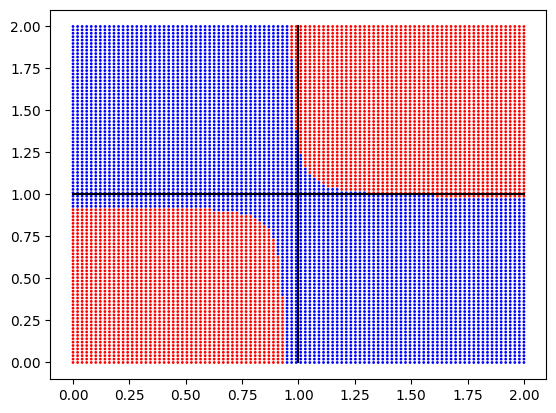

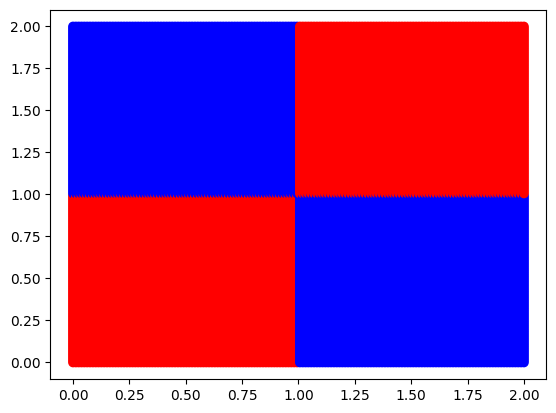

In [8]:
names, labels, data = LoadCategoricalData("Data/XOR_160.dat")
P = NonlinearPerceptron(10)
P.Train(data,labels,50)

cols = ['red','blue']
x = np.linspace(0,2,100)
y = np.linspace(0,2,100)

N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = ['']*N
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in tqdm(enumerate(x)):
	for j,yp in enumerate(y):
		l = P.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = cols[int(l)]
		s+=1

pt.scatter(xs,ys,1,zs)
pt.plot([0,2],[1,1],'k')
pt.plot([1,1],[0,2],'k')
pt.show()
PlotData(data,np.array(labels)) # plot on different axis because otherwise it gets a bit dense

## Exercise 3: A Multilayered Perceptron

We have seen that, although incredibly easy to implement and train, a Perceptron has fundamental limitations. In their normal form, they can only split a (hyperdimensional) plane into two parts; and even when we augment our input space with hand-crafted non-linearity, there are still some problems that it cannot solve. 

Let us assume, therefore, that the problem was *too few decision points*. The perceptron fundamentally, makes a choice if something is above or below a certain line. But some decisions are more complex than that. How can we let the Perceptron make more sub-decisions, before coming to a final conclusion? **A network of nodes!**

**Fill in the Network, Layer and Node classes such that they obey the following restrictions**
* A Network *has* a number of layers. 
* Each layer *has* a number of nodes. 
* Each node *has* an (individual) weight vector. 
* The dimension (length) of each weight vector is equal to the number of nodes in the previous layer. 
	* The dimension of the weight vector in the first layer is equal to the dimension of your data
* A Network takes as input a datum, and outputs a prediction. 
* A Layer takes as input the output from the previous layer (the first layer takes the network input)
	* The layer then gives that vector to each node, which performs $y_i = \mathbf{w}_i \cdot \begin{bmatrix} 1 \\ \mathbf{x} \end{bmatrix}$ on it. 
	* The layer then assembles each $y_i$ into a new vector $\mathbf{y}$. This is the output of the layer.
* The Network takes the output of the final layer and performs the usual Perceptron classifier on it: if the result is greater than 0 it returns "yes", if less than 0 it returns "no".

This sounds complex, but for now, is essentially just a complex series of handing vectors between the Network, the Layers and the Nodes. The nodes do a dot product, the Layers assemble that into a vector, and hand it off to the next layer. 

In [35]:

# A linear node is a simple perceptron node (without the >0 check). It's a dot product between the weights and the 
class Node:
	def __init__(self):
		self.Weights = np.zeros((0,)) ## initialise an empty vector -- we cannot populate it yet because we don't know how big it is. We only know when the Network has been assembled. 

	## this function informs the node of its dimensions, and is called by the Network & Layer after construction.
	def Initialise(self, dimension):
		self.Weights = 2*(np.random.random((dimension,)) - 0.5) # randomly initialises to a value between -1 and 1.
	
	def Predict(self, inputVector): ##I assume that the layer will augment for me, to save some CPU cycles
		return np.dot(self.Weights,inputVector)


## A layer is a collection of nodes. The layer takes an input vector, distributes them to the nodes, and then aggregates the data.
class Layer:
	def __init__(self,nodeCount, nodeType=Node):
		#nodeCount is the number of nodes in the data, and nodeType is a class object. Note that I have defined nodeType as the *class*, not a member of that class; this lets the layer call the initialiser itself, and avoid the copying issues python can sometimes encounter.

		## should initialise the nodes so that they contain nodeCount copies of the nodeType class. Be careful that you initialise the node (so call nodeType(), don't just put nodeType into your vector).
		self.Nodes = []
		for i in range(nodeCount):
			self.Nodes.append(nodeType())
		self.OutputVector = np.zeros((nodeCount,)) #rather than returning a vector and passing it around, I store it as a member of the class. Then I just slot things in rather than creating a new vector each loop. Saves some CPU cycles.
		
	def Initialise(self,previousLayerDimension):
		for node in self.Nodes:
			node.Initialise(previousLayerDimension)

	def Predict(self, inputVector):
		augmentedVector = np.insert(inputVector,0,1)
		for i,node in enumerate(self.Nodes):
			self.OutputVector[i] = node.Predict(augmentedVector)


## The Network class is your ``
class Network:
	def __init__(self, inputDimension, outputDimension=1):
		#input dimension is the dimension of your data -- so [x,y] is 2. 
		#output dimension is the dimension of your prediction -- for now this is a binary yes/no -- so one dimension. 

		self.Layers = [] #this is where your layers will go
		self.InputDimension = inputDimension
		self.OutputDimension = outputDimension

	def AddLayer(self, layerObject): #append a layer object into your network. 
		self.Layers.append(layerObject)

	def Initialise(self):
		##need an initialisation function because your network doesn't know (for instance) what dimension each of the weight vectors should be until it can see the final layer structure -- remember the dimension of the n-th layer weight vectors is equal to the number of nodes in the (n-1)th layer. 


		## this funciton should initialise each layer, giving them the correct information
		previousLayerDimension = self.InputDimension
		for layer in self.Layers:
			layer.Initialise(previousLayerDimension+1) ## the +1 is for the `bias` term. If you're manually including the bias, you don't need this
			previousLayerDimension = len(layer.Nodes)
	
		##then check that my dimensions make sense!
		if previousLayerDimension != self.OutputDimension:
			print("ERROR! Your network output dimension is not equal to the final layer dimension")



	def Predict(self, inputVector):

		self.Layers[0].Predict(inputVector)
		for i in range(1,len(self.Layers)):
			self.Layers[i].Predict(self.Layers[i-1].OutputVector)
		finalValue = self.Layers[-1].OutputVector
		##techincally this is a hack because I know that the dimension is 1 -- this is just for the curent challenge!
		return int(finalValue > 0)
	
	def Train(self, data,labels):

		#Leave this for now. It's going to be a big one!
		return


	
			

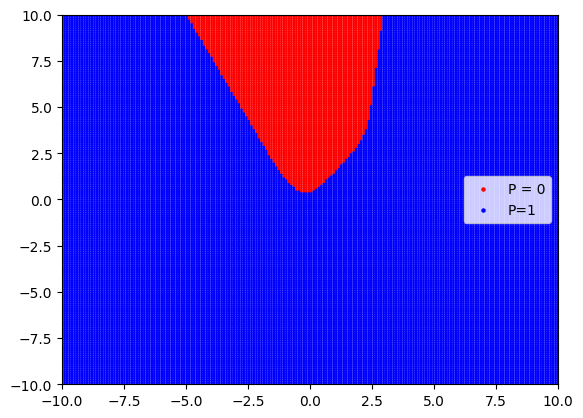

In [41]:
# np.random.seed(1)

network = Network(2,1)
network.AddLayer(Layer(5))
network.AddLayer(Layer(3))
network.AddLayer(Layer(1))
network.Initialise()

cols = ['red','blue']
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)

N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = ['']*N
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in enumerate(x):
	for j,yp in enumerate(y):
		l = network.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = cols[int(l)]
		s+=1

pt.scatter([-100],[-100],5,'r',label='P = 0')
pt.scatter([-100],[100],5,'b',label='P=1')
pt.legend()
pt.scatter(xs,ys,1,zs)
pt.xlim([-10,10])
pt.ylim([-10,10])
# pt.annotate("Not Cute",[2.5,7],size=20)
# pt.annotate("Cute",[7.5,2],size=20)
# pt.xlabel("Size")
# pt.ylabel("Fur")

pt.show()

### Exercise 5: Solving Our Problems

The problem identified above can *only* be solved by altering the way our neurons/nodes work.

**Write you own custom node activation function, then retest your network. Did this fix the problematic behaviour?**

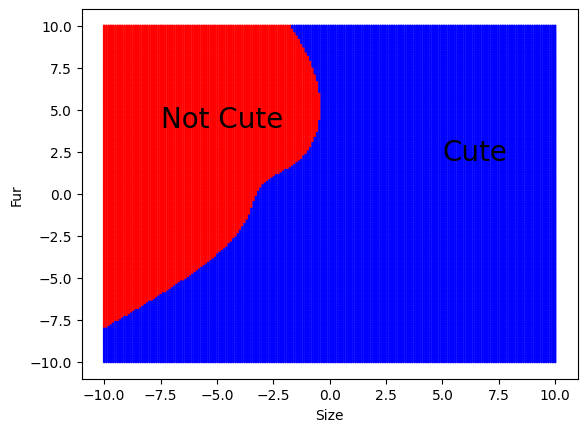

In [11]:
class SigmoidNode (Node):

	def Predict(self, inputVector):
		a = np.dot(self.Weights,inputVector)
		return 1.0/(1.0 + np.exp(-a))
	
np.random.seed(1)
network = Network(2,1)
network.AddLayer(Layer(5,SigmoidNode))
network.AddLayer(Layer(3,SigmoidNode))
network.AddLayer(Layer(1))
network.Initialise()

cols = ['red','blue']
x = np.linspace(-10,10,200)
y = np.linspace(-10,10,200)

N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = ['']*N
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in enumerate(x):
	for j,yp in enumerate(y):
		l = network.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = cols[int(l)]
		s+=1

pt.scatter(xs,ys,1,zs)
pt.annotate("Not Cute",[-7.5,4],size=20)
pt.annotate("Cute",[5,2],size=20)
pt.xlabel("Size")
pt.ylabel("Fur")
pt.show()

In [16]:
class CostFunction:
		
	def Compute(self,prediction,label):
		if type(prediction) is list:
			v = 0
			for p,i in enumerate(prediction):
				v += self.Compute(p,label[i])
			return v
		return -(prediction - label)**2
	
	def Gradient(self,prediction,label):
		return -2 * (prediction - label)


In [13]:

class Node:
	def __init__(self):
		self.Weights = np.zeros((0,)) 
		

	def Initialise(self, dimension):
		self.Weights = np.random.normal(0,0.3,(dimension,))
		self.InternalGradient = np.zeros(self.Weights.shape)
		self.M = np.zeros(self.Weights.shape)
		self.V = np.zeros(self.Weights.shape)
		
		self.L = 1
		self.Y = 0
		self.dLdY = 0

	def Predict(self, inputVector): ##I assume that the layer will augment for me, to save some CPU cycles
		self.Y = np.dot(self.Weights,inputVector)
		return self.ActivationFunction(self.Y)
	
	def ActivationFunction(self, inputValue):
		return inputValue

	def ActivationGradient(self, inputValue):
		return 1
	
	def UpdateGradient(self, dLdY, inputVector):
		self.dLdY = dLdY
		self.InternalGradient += self.dLdY * inputVector 
	def UpdateWeights(self,alpha):
		b1 = 0.5
		b2 = 0.7
		c1 = 1.0/(1.0 - b1**self.L)
		c2 = 1.0/(1.0 - b2**self.L)
		self.L += 1
		self.M = b1 * self.M + (1.0 - b1) * self.InternalGradient
		self.V = b2 * self.V + (1.0 - b2) * self.InternalGradient * self.InternalGradient

		step = alpha * (c1 *self.M)/np.sqrt(self.V*c2 + 1e-20)
		self.Weights += step
		self.InternalGradient *= 0 ## clear for the next iteration!

class SigmoidNode (Node):

	def ActivationFunction(self, y):
		return 1.0/(1.0 + np.exp(-y))
	def ActivationGradient(self, y):
		return np.exp(-y)/(1.0 + np.exp(-y))**2
class ReluNode (Node):

	def ActivationFunction(self, y):
		if y > 0:
			return y
		return 0.1*y
	def ActivationGradient(self, y):
		if y > 0:
			return 1
		return 0.1

## A layer is a collection of nodes. The layer takes an input vector, distributes them to the nodes, and then aggregates the data.
class Layer:
	def __init__(self,nodeCount, nodeType=Node):
		self.Nodes = []
		for i in range(nodeCount):
			self.Nodes.append(nodeType())
		self.OutputVector = np.zeros((nodeCount+1,))
		self.OutputVector[0] = 1
		
	def Initialise(self,previousLayerDimension):
		for node in self.Nodes:
			node.Initialise(previousLayerDimension)

	def Predict(self, inputVector):
		for i,node in enumerate(self.Nodes):
			self.OutputVector[i+1] = node.Predict(inputVector) ##offset for augmentation purposes!

	def MiddleLayerGradient(self,layerAbove,inputVector):
		for i,node in enumerate(self.Nodes):

			dLdy = 0
			for innernode in layerAbove.Nodes:
				dLdy += innernode.Weights[i+1] * innernode.dLdY
			dLdy *= node.ActivationGradient(node.Y)
			node.UpdateGradient(dLdy,inputVector)

	def FinalLayerGradient(self,dLdP,inputVector):
		for node in self.Nodes:
			node.UpdateGradient(dLdP * node.ActivationGradient(node.Y),inputVector)

	def UpdateWeights(self,alpha):
		for node in self.Nodes:
			node.UpdateWeights(alpha)
		
class Network:
	def __init__(self, inputDimension, outputDimension=1):
		#input dimension is the dimension of your data -- so [x,y] is 2. 
		#output dimension is the dimension of your prediction -- for now this is a binary yes/no -- so one dimension. 

		self.Layers = [] #this is where your layers will go
		self.InputDimension = inputDimension
		self.OutputDimension = outputDimension

	def AddLayer(self, layerObject): #append a layer object into your network. 
		self.Layers.append(layerObject)

	def Initialise(self):
		##need an initialisation function because your network doesn't know (for instance) what dimension each of the weight vectors should be until it can see the final layer structure -- remember the dimension of the n-th layer weight vectors is equal to the number of nodes in the (n-1)th layer. 


		## this funciton should initialise each layer, giving them the correct information
		previousLayerDimension = self.InputDimension
		for layer in self.Layers:
			layer.Initialise(previousLayerDimension+1) ## the +1 is for the `bias` term. If you're manually including the bias, you don't need this
			previousLayerDimension = len(layer.Nodes)
	
		##then check that my dimensions make sense!
		if previousLayerDimension != self.OutputDimension:
			print("ERROR! Your network output dimension is not equal to the final layer dimension")

	def Predict(self, inputVector):
		augment = np.insert(inputVector,0,1)
		self.Layers[0].Predict(augment)
		for i in range(1,len(self.Layers)):
			self.Layers[i].Predict(self.Layers[i-1].OutputVector)
		finalValue = self.Layers[-1].OutputVector[1:] ##have to omit the augment from the final layer
		##techincally this is a hack because I know that the dimension is 1 -- this is just for the curent challenge!
		return finalValue
	
	def Train(self, data,labels,costFunc = CostFunction(),Nsteps=1000):
		self.Initialise()
		C = 0
		for l,d in enumerate(data):
			p = self.Predict(d)
			C += costFunc.Compute(p,labels[l])
		
		alpha = 0.1
		nBatches = 1
		if len(data) > 100:
			batchSize = len(data)/20
		else:
			batchSize = len(data)

		increase = (len(data)/2 - batchSize)/(0.6*Nsteps)
		prevC = None
		alphaMin = 1e-5
		alphaMax = 0.3
		alphaBonus = 1.2
		toggle = 0
		collectC = 0
		ids = np.arange(len(data))
		for steps in range(Nsteps):
			q = 0
			np.random.shuffle(ids)

			C = 0			
		
			for id in ids:
				p = self.Predict(data[id])
				C += costFunc.Compute(p,labels[id])

				dCdP = costFunc.Gradient(p,labels[id])
				self.Layers[-1].FinalLayerGradient(dCdP,self.Layers[-2].OutputVector)
				for j in np.arange(len(self.Layers)-2,-1,-1):
					if j > 0:
						vec = self.Layers[j-1].OutputVector
					else:
						vec = np.insert(data[id],0,1)
					self.Layers[j].MiddleLayerGradient(self.Layers[j+1],vec)

				
				q+=1
				if q == int(batchSize):
					q=0
					for lNum,layer in enumerate(self.Layers):
						damper = 1.1**(len(self.Layers) - lNum)
						layer.UpdateWeights(alpha/damper)
			
			for lNum,layer in enumerate(self.Layers):
				damper = 1.1**(len(self.Layers) - lNum)
				layer.UpdateWeights(alpha/damper)
			batchSize = min(batchSize+increase,len(data))
			if batchSize > len(data)/2:
				batchSize = len(data)
			
			
			collectC += C

			check = 30
			if (steps) % check == 0:
				if prevC is not None:
					collectC /= check

				
				if prevC is not None:
					if collectC > prevC:
						# if abs(collectC - prevC)/abs(prevC) > 1.0001:
						alpha *= alphaBonus
						alpha = min(alpha,alphaMax)
					elif collectC < prevC:
						alpha /= (alphaBonus+0.5)
						alpha = max(alpha,alphaMin)
						alphaBonus = max(0.99*alphaBonus,1.05)
				
				if prevC is None:
					prevC = collectC*1.0
				else:
					w = 0
					prevC = w*prevC +(1.0 - w) * collectC
			# if steps % 100 == 0:
				print(steps,"C=",collectC,alpha,alphaBonus)
				collectC = 0
				
		return

0 C= [-12.53593208] 0.1 1.2
30 C= [-8.52518076] 0.12 1.2
60 C= [-7.51145791] 0.144 1.2
90 C= [-6.16082222] 0.17279999999999998 1.2
120 C= [-5.19992138] 0.20735999999999996 1.2
150 C= [-5.65257614] 0.12197647058823527 1.188
180 C= [-3.67272877] 0.14490804705882349 1.188
210 C= [-3.90650045] 0.08584599944243097 1.1761199999999998
240 C= [-2.81194171] 0.1009651968642319 1.1761199999999998
270 C= [-3.02240992] 0.06023745129479507 1.1643587999999998
300 C= [-1.98288004] 0.07013800650466602 1.1643587999999998
330 C= [-1.83800564] 0.08166580508816511 1.1643587999999998
360 C= [-1.92157794] 0.04906742770138573 1.1527152119999997
390 C= [-0.48126171] 0.056560770325097515 1.1527152119999997
420 C= [-0.24999438] 0.06519846035617807 1.1527152119999997
450 C= [-0.89409999] 0.039449301296912175 1.1411880598799997
480 C= [-0.80694109] 0.04501907161064476 1.1411880598799997
510 C= [-0.03929597] 0.051375226988950466 1.1411880598799997
540 C= [-0.03644272] 0.05862879561341498 1.1411880598799997
570 C= [

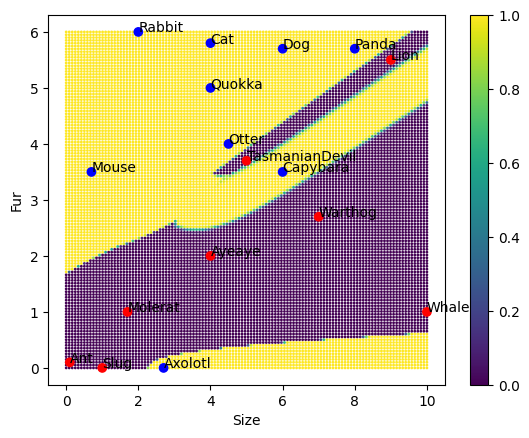

In [14]:

names, labels, data = LoadCategoricalData("Data/cuteness_augmented.dat")
# data = [data[0]]
# labels = [labels[0]]
np.random.seed(1)

class ProbCost:
	def Compute(self,prediction,label):
		if label == 1:
			return np.log(prediction+0.00000001)
		else:
			return np.log(1.00000001 - prediction)
	
	def Gradient(self,prediction,label):
		if label == 1:
			return 1.0/(prediction+0.00000001)
		else:
			return -1.0/(1.00000001 - prediction)


network = Network(2,1)
# network.AddLayer(Layer(5,SigmoidNode))
# # network.AddLayer(Layer(10,ReluNode))
network.AddLayer(Layer(10,SigmoidNode))
# network.AddLayer(Layer(10,SigmoidNode))
network.AddLayer(Layer(6,ReluNode))
network.AddLayer(Layer(3,ReluNode))
network.AddLayer(Layer(1,SigmoidNode))
network.Train(data,labels,ProbCost(),1000)

# x = np.linspace(0,2,120)
# y = np.linspace(0,2,120)
x = np.linspace(0,10,120)
y = np.linspace(0,6,120)

N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = ['']*N
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in enumerate(x):
	for j,yp in enumerate(y):
		l = network.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = l*1.0
		s+=1
pt.scatter(xs,ys,1,zs)
pt.xlabel("Size")
pt.ylabel("Fur")
pt.colorbar()
pt.clim([0,1])
PlotData(data,labels,names)

/var/folders/xd/zs2rr3sj1fg26d5dczf3n51c0000gq/T/ipykernel_87045/2931453889.py:14: RuntimeWarning: overflow encountered in exp
  m = 1.8/(1 + np.exp((rb-0.5)/0.5))


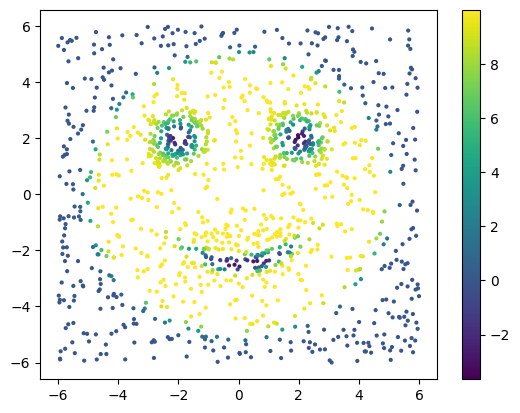

0 C= [-27426.21647902] 0.1 1.2
30 C= [-12037.00828816] 0.12 1.2
60 C= [-11257.98258846] 0.144 1.2
90 C= [-9440.95327403] 0.17279999999999998 1.2
120 C= [-5095.37313499] 0.20735999999999996 1.2
150 C= [-4624.42346434] 0.24883199999999994 1.2
180 C= [-4985.18635533] 0.1463717647058823 1.188
210 C= [-2209.63249851] 0.17388965647058818 1.188
240 C= [-2364.1364164] 0.10301519933091717 1.1761199999999998
270 C= [-1027.99033894] 0.12115823623707829 1.1761199999999998
300 C= [-1145.88964619] 0.07228494155375409 1.1643587999999998
330 C= [-531.55559996] 0.08416560780559923 1.1643587999999998
360 C= [-572.9480294] 0.05056938912787269 1.1527152119999997
390 C= [-348.59658532] 0.05829210410924625 1.1527152119999997
420 C= [-349.79584096] 0.03527050739655578 1.1411880598799997
450 C= [-211.60886218] 0.04025028190685867 1.1411880598799997
480 C= [-227.83725497] 0.024525088191173952 1.1297761792811998
510 C= [-166.35867263] 0.027707860433158978 1.1297761792811998
540 C= [-183.39925583] 0.017001021849

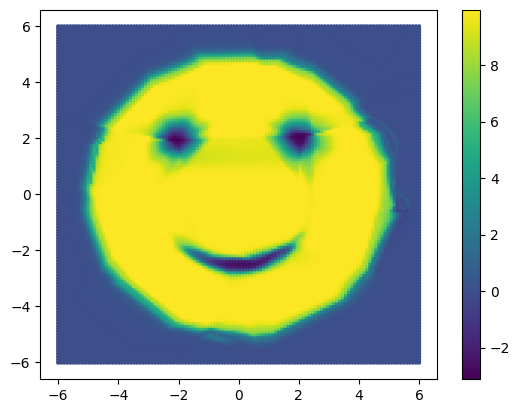

In [15]:
def f(x,y):
	d = np.sqrt(x**2 + y**2)
	outer = 1.0/(1 + np.exp((d-5)/0.1))
	
	d2 = np.sqrt((x-2)**2 + (y-2)**2)
	e1= 1.5/(1 + np.exp((d2-0.5)/0.2))

	d3 = np.sqrt((x+2)**2 + (y-2)**2)
	e2= 1.5/(1 + np.exp((d3-0.5)/0.2))

	xr = x/2
	yr = (y + 2.5)/0.8
	rb = (0.1-xr)**2 + (7*(yr-xr**2)**2)
	m = 1.8/(1 + np.exp((rb-0.5)/0.5))
	return 10*(outer - e1 - e2 - m)
	# inner = 0.9/(1 + np.exp((d-3)/0.1))
	# return max(0.01,outer-inner)
def random(lower,upper):
	return lower + (upper - lower)*np.random.random()
np.random.seed(0)
N = 1250
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = np.zeros((N,))
s= 0
d = [[0,0]]*N
for i in range(N):
	x = random(-6,6)
	y = random(-6,6)
	if i < 2*N/3:
		x = random(-6,6)
		y = random(-6,6)
	elif i < 7*N/9:
		x = random(-3,-1)
		y = random(1,3)
	elif i < 8*N/9:
		x = random(1,3)
		y = random(1,3)
	else:
		x = random(-2,2)
		y = random(-3,-1)
	z = f(x,y)
	xs[i] = x
	ys[i] = y
	d[i] = np.array([x,y])

	zs[i] = z

pt.scatter(xs,ys,4,zs)
pt.colorbar()
pt.show()

# np.random.seed(3)
network = Network(2,1)
network.AddLayer(Layer(8,ReluNode))
network.AddLayer(Layer(15,SigmoidNode))
# network.AddLayer(Layer(12,SigmoidNode))
# network.AddLayer(Layer(20,SigmoidNode))
# network.AddLayer(Layer(10,SigmoidNode))
# network.AddLayer(Layer(4,SigmoidNode))
network.AddLayer(Layer(10,SigmoidNode))
# network.AddLayer(Layer(15,SigmoidNode))
# network.AddLayer(Layer(3,ReluNode))
network.AddLayer(Layer(6,ReluNode))
network.AddLayer(Layer(10,SigmoidNode))
# network.AddLayer(Layer(10,ReluNode))
network.AddLayer(Layer(1))


network.Train(d,zs,CostFunction(),1500)



x = np.linspace(-6,6,120)
y = np.linspace(-6,6,120)
N = len(x)*len(y)
xs = np.zeros((N,))
ys = np.zeros((N,))
zs = np.zeros((N,))
s= 0
z = np.zeros((len(y),len(x)))
for i,xp in enumerate(x):
	for j,yp in enumerate(y):
		l = network.Predict(np.array([xp,yp]))
		xs[s] = xp
		ys[s] = yp
		zs[s] = l
		s+=1
pt.scatter(xs,ys,5,zs)
pt.colorbar()
pt.show()

In [ ]:
class CostFunction:
		
	def Compute(self,prediction,label):
		return -(prediction - label)**2
	
	def Gradient(self,prediction,label):
		return -2 * (prediction - label)
	
class Node:

	def Initialise(self, dimension):
		#initialise vectors or correct shape
		self.Weights = np.random.normal(0,0.3,(dimension,))
		self.InternalGradient = np.zeros(self.Weights.shape)
		self.M = np.zeros(self.Weights.shape)
		self.V = np.zeros(self.Weights.shape)

		#initialise counter
		self.L = 1

		#initialise holder variables
		self.Y = 0
		self.dLdY = 0

	def Predict(self, inputVector): 
		self.Y = np.dot(self.Weights,inputVector) #store in member for use later.
		return self.ActivationFunction(self.Y)
	
	def ActivationFunction(self, inputValue): #default function (linear). Overwritten by child classes
		return inputValue

	def ActivationGradient(self, inputValue): #default function (linear). Overwritten by child classes
		return 1
	
	def UpdateGradient(self, dLdY, inputVector): 
		self.dLdY = dLdY
		self.InternalGradient += self.dLdY * inputVector 
	def UpdateWeights(self,alpha):
		b1 = 0.5
		b2 = 0.7
		c1 = 1.0/(1.0 - b1**self.L)
		c2 = 1.0/(1.0 - b2**self.L)
		self.L += 1
		self.M = b1 * self.M + (1.0 - b1) * self.InternalGradient
		self.V = b2 * self.V + (1.0 - b2) * self.InternalGradient * self.InternalGradient

		step = alpha * (c1 *self.M)/np.sqrt(self.V*c2 + 1e-20)

		# step = alpha * self.InternalGradient / np.linalg.norm(self.InternalGradient)
		self.Weights += step
		self.InternalGradient *= 0 ## clear for the next iteration!


class Layer:
	def __init__(self,nodeCount, nodeType=Node):
		self.Nodes = []
		for i in range(nodeCount):
			self.Nodes.append(nodeType())
		self.OutputVector = np.zeros((nodeCount+1,)) ##augmentation occurs here. = \tilde{x}!
		self.OutputVector[0] = 1 #and there's my augmentation value
		
	def Initialise(self,previousLayerDimension):
		for node in self.Nodes:
			node.Initialise(previousLayerDimension)

	def Predict(self, inputVector):
		for i,node in enumerate(self.Nodes):
			self.OutputVector[i+1] = node.Predict(inputVector) ##offset for augmentation purposes!

	def MiddleLayerGradient(self,layerAbove,inputVector):
		for i,node in enumerate(self.Nodes):

			dLdy = 0
			for innernode in layerAbove.Nodes:
				dLdy += innernode.Weights[i+1] * innernode.dLdY
			dLdy *= node.ActivationGradient(node.Y)
			node.UpdateGradient(dLdy,inputVector)

	def FinalLayerGradient(self,dLdP,inputVector):
		for node in self.Nodes:
			node.UpdateGradient(dLdP * node.ActivationGradient(node.Y),inputVector)

	def UpdateWeights(self,alpha):
		for node in self.Nodes:
			node.UpdateWeights(alpha)

	
class Network:
	def __init__(self, inputDimension, outputDimension=1):
		self.Layers = [] 
		self.InputDimension = inputDimension
		self.OutputDimension = outputDimension

	def AddLayer(self, layerObject):
		self.Layers.append(layerObject)

	def Initialise(self):
		previousLayerDimension = self.InputDimension
		for layer in self.Layers:
			layer.Initialise(previousLayerDimension+1) ## the +1 is for the `bias` term. 
			previousLayerDimension = len(layer.Nodes)
	
		##then check that my dimensions make sense!
		if previousLayerDimension != self.OutputDimension:
			print("ERROR! Your network output dimension is not equal to the final layer dimension")

	def Predict(self, inputVector):
		if len(inputVector) == self.InputDimension:
			inputVector = np.insert(inputVector,0,1)
		self.Layers[0].Predict(inputVector)
		for i in range(1,len(self.Layers)):
			self.Layers[i].Predict(self.Layers[i-1].OutputVector)
		return self.Layers[-1].OutputVector[1:] ##have to omit the augment from the final layer
	
	def Train(self, data,labels,costFunc = CostFunction(),Nsteps=1000):
		self.Initialise()

		alpha = 0.1
		N = len(data)
		for i in range(N):
			data[i]= np.insert(data[i],0,1) #augment the data up front

		for steps in range(Nsteps):

			C = 0					
			for id in range(N): 
				p = self.Predict(data[id])
				C += costFunc.Compute(p,labels[id]) #have to call cost func first to populate node.Y (forward-pass)

				dCdP = costFunc.Gradient(p,labels[id]) #computes gradient with respect to the prediction
				self.Layers[-1].FinalLayerGradient(dCdP,self.Layers[-2].OutputVector)

				for j in np.arange(len(self.Layers)-2,-1,-1):
					if j > 0:
						self.Layers[j].MiddleLayerGradient(self.Layers[j+1],self.Layers[j-1].OutputVector)
					else:
						self.Layers[j].MiddleLayerGradient(self.Layers[j+1],data[id])
					

				
			
			for layer in self.Layers:
				layer.UpdateWeights(alpha)
			
			if steps % 100 == 0:
				print(steps,"C=",C,alpha)
				alpha*=0.9
		return